Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient_ID         20 non-null     int64         
 1   Name               20 non-null     object        
 2   Age                20 non-null     int64         
 3   Gender             20 non-null     object        
 4   Treatment          20 non-null     object        
 5   Department         20 non-null     object        
 6   Admission_Date     20 non-null     datetime64[ns]
 7   Discharge_Date     20 non-null     datetime64[ns]
 8   Treatment_Cost     20 non-null     int64         
 9   Insurance_Covered  20 non-null     object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 1.7+ KB
None

First 5 Rows:
   Patient_ID    Name  Age Gender Treatment   Department Admission_Date  \
0           1    John   13   Male       MRI  Orthopedics   

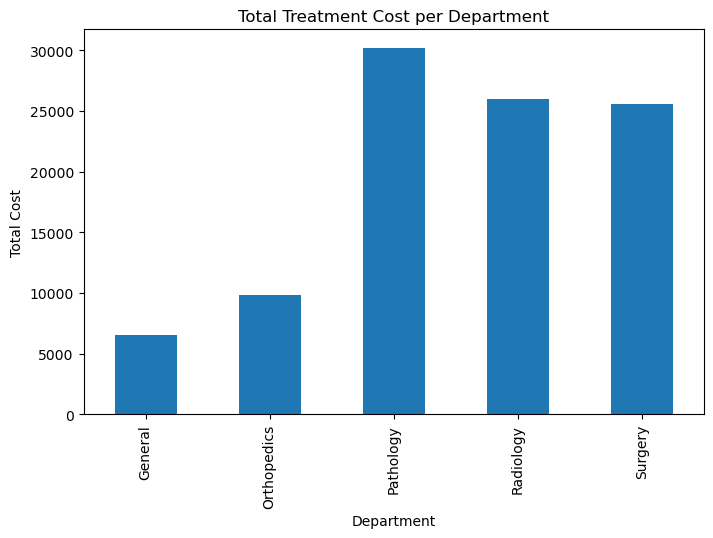

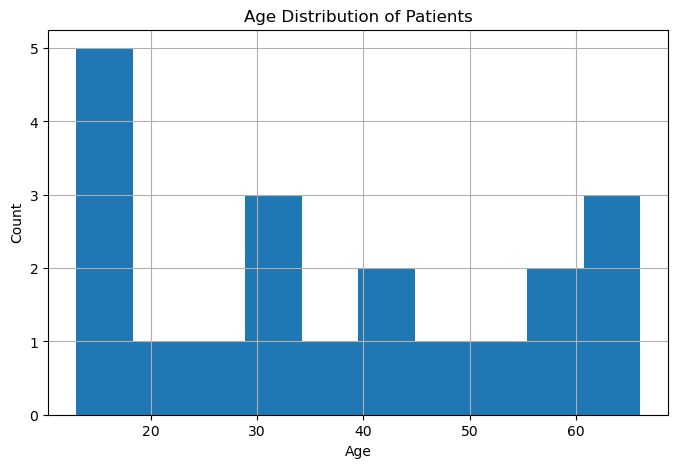


Data exported to hospital_data_cleaned.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 imagining some duplicate data 
data = {
    "Patient_ID": range(1, 21),
    "Name": ["John", "Anita", "Ramesh", "Sara", "Ali", "Meena", "David", "Arjun", "Fatima", "Priya",
             "Tom", "Suresh", "Nina", "Mohit", "Sophia", "Kiran", "James", "Zara", "Krishna", "Emma"],
    "Age": np.random.randint(10, 70, 20),
    "Gender": np.random.choice(["Male", "Female"], 20),
    "Treatment": np.random.choice(["X-Ray", "MRI", "Surgery", "Therapy", "Blood Test"], 20),
    "Department": np.random.choice(["Radiology", "Orthopedics", "Surgery", "General", "Pathology"], 20),
    "Admission_Date": pd.date_range(start="2024-01-01", periods=20, freq="7D"),
    "Discharge_Date": pd.date_range(start="2024-01-03", periods=20, freq="7D"),
    "Treatment_Cost": np.random.randint(1000, 10000, 20),
    "Insurance_Covered": np.random.choice(["Yes", "No"], 20)
}

df = pd.DataFrame(data)


# 2. Exploreing Data

print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())


# 3. Data Cleaning

# if Treatment_Cost has missing values
df.loc[2, "Treatment_Cost"] = np.nan
df["Treatment_Cost"] = df["Treatment_Cost"].fillna(df["Treatment_Cost"].mean())



# 4. Grouping & Aggregation

print("\nAverage cost per Department:")
print(df.groupby("Department")["Treatment_Cost"].mean())

print("\nNumber of patients per Treatment:")
print(df.groupby("Treatment")["Patient_ID"].count())


# 5. Filtering

under_30 = df[(df["Age"] < 30) & (df["Insurance_Covered"] == "Yes")]
print("\nPatients under 30 with insurance:")
print(under_30)


# 6. New Columns

df["Stay_Duration"] = (df["Discharge_Date"] - df["Admission_Date"]).dt.days


# 7. Visualization

plt.figure(figsize=(8,5))
df.groupby("Department")["Treatment_Cost"].sum().plot(kind="bar")
plt.title("Total Treatment Cost per Department")
plt.xlabel("Department")
plt.ylabel("Total Cost")
plt.show()

plt.figure(figsize=(8,5))
df["Age"].hist(bins=10)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# 8. Export Cleaned Data

df.to_csv("hospital_data_cleaned.csv", index=False)
print("\nData exported to hospital_data_cleaned.csv")
